# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [45]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [46]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain here why you have changed it.

In [47]:
ID = 2087639 # COMPLETE
np.random.seed(ID)

Now we load the dataset using the function above.

In [48]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [49]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [50 47 49 48 47 53 51 56 49 50]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [50]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


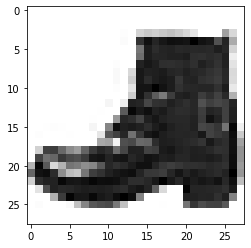

LABEL: 9
INPUT:


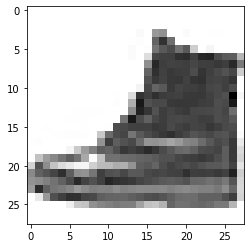

LABEL: 9
INPUT:


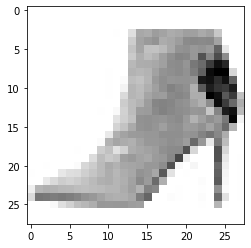

LABEL: 9


In [51]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

### TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn, and verbose=True allows you to see how loss changes in iterations (note that the loss used by the MLPClassifier may be different from the 0-1 loss, also called accuracy).

Then, using the default activation function, we consider four architectures, with different numbers of hidden layers and different sizes. To evaluate the architectures we use the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture.


In [52]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

#ADD YOUR CODE
mlp_cv = MLPClassifier(hl_parameters,max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
mlp_cv_gs=GridSearchCV(mlp_cv,hl_parameters,cv=5)
mlp_cv_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes={'hidden_layer_sizes': [(10,),
                                                                                (50,),
                                                                                (10,
                                                                                 10),
                                                                                (50,
                                                                                 50)]},
                                     learning_rate_init=0.1, max_iter=300,
                                     random_state=2087639, solver='sgd'),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [53]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_cv_gs.best_estimator_) #ADD YOUR CODE

print("Score with best parameters:")
print('{:.3f}'.format(mlp_cv_gs.best_score_)) #ADD YOUR CODE

from IPython.display import display
import pandas as pd   

print("\nAll scores on the grid:")
display(pd.DataFrame(mlp_cv_gs.cv_results_).sort_values(by='rank_test_score')) #ADD YOUR CODE

RESULTS FOR NN

Best parameters set found:
MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=300,
              random_state=2087639, solver='sgd')
Score with best parameters:
0.770

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.675534,0.036999,0.000879,0.000157,"(50,)","{'hidden_layer_sizes': (50,)}",0.81,0.75,0.79,0.79,0.71,0.770,0.035777,1
3,0.431127,0.126403,0.000968,0.000238,"(50, 50)","{'hidden_layer_sizes': (50, 50)}",0.79,0.72,0.75,0.78,0.71,0.750,0.031623,2
0,0.523624,0.137876,0.000814,0.000235,"(10,)","{'hidden_layer_sizes': (10,)}",0.74,0.68,0.71,0.25,0.71,0.618,0.184976,3
2,0.187574,0.083629,0.000751,0.000119,"(10, 10)","{'hidden_layer_sizes': (10, 10)}",0.46,0.46,0.14,0.30,0.59,0.390,0.155177,4


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

**ANSWER:** The analysis of the top 2 best neural network (NN) models shows us that using more layers and more neurons within a NN does not necessarily guarantee higher performance than a NN with fewer layers and fewer neurons.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above. Use the attribute *best_estimator_* to pick the best architecture already re-trained on the training dataset (more infos in the documentation of GridSearchCV).

In [54]:
#get training and test error for the best NN model from CV

mlp = mlp_cv_gs.best_estimator_ #ADD YOUR CODE
mlp.fit(X_train, y_train) #ADD YOUR CODE

training_error = 1. - mlp.score(X_train,y_train) #ADD YOUR CODE

test_error = 1. - mlp.score(X_test,y_test) #ADD YOUR CODE

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.221580


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before.

In [55]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1027, 1019, 1027, 1025,  969,  984, 1024,  965,  973,  987]))

## TO DO 4

Now train the NNs with the added data points. This time you can run for 100 iterations if you cannot run for 300 iterations.

In [56]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

#ADD YOUR CODE
mlp_large_cv = MLPClassifier(hl_parameters,max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
mlp_large_cv_gs=GridSearchCV(mlp_large_cv,hl_parameters,cv=5)
mlp_large_cv_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes={'hidden_layer_sizes': [(10,),
                                                                                (50,),
                                                                                (10,
                                                                                 10),
                                                                                (50,
                                                                                 50)]},
                                     learning_rate_init=0.1, max_iter=300,
                                     random_state=2087639, solver='sgd'),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [57]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_large_cv_gs.best_estimator_) #ADD YOUR CODE

print("Score with best parameters:")
print(1. - mlp_large_cv_gs.best_score_) #ADD YOUR CODE

print("\nAll scores on the grid:")
display(pd.DataFrame(mlp_large_cv_gs.cv_results_).sort_values(by='rank_test_score')) #ADD YOUR CODE

RESULTS FOR NN

Best parameters set found:
MLPClassifier(hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=300,
              random_state=2087639, solver='sgd')
Score with best parameters:
0.14990000000000003

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,6.850015,1.964293,0.004668,0.000035,"(50, 50)","{'hidden_layer_sizes': (50, 50)}",0.8480,0.8430,0.8615,0.8495,0.8485,0.8501,0.006127,1
1,6.497423,1.437040,0.004678,0.000325,"(50,)","{'hidden_layer_sizes': (50,)}",0.8470,0.8395,0.8470,0.8355,0.8460,0.8430,0.004680,2
0,4.281569,0.638674,0.003370,0.000255,"(10,)","{'hidden_layer_sizes': (10,)}",0.8310,0.7935,0.7925,0.7915,0.7925,0.8002,0.015413,3
2,3.965772,1.568527,0.003208,0.000019,"(10, 10)","{'hidden_layer_sizes': (10, 10)}",0.8345,0.5000,0.8235,0.7895,0.8210,0.7537,0.127730,4


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

**ANSWER:** In the present scenario, the optimal architecture remains the same as in the previous analysis, however the performance has improved significantly due to the increase in the data used.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. 

In [58]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
best_mlp_large = mlp_large_cv_gs.best_estimator_
best_mlp_large.fit(X_train, y_train)

training_error = 1. - best_mlp_large.score(X_train,y_train) #ADD YOUR CODE
test_error = 1. - best_mlp_large.score(X_test,y_test) #ADD YOUR CODE

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.045900
Best NN test error: 0.162160


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

**ANSWER:** The optimal differences of the models remain the same but the test error decreases by the value of 0.065, highlighting the importance of having an adequate number of samples as well as choosing an adequate architecture. Furthermore, it is not always necessary to use too much data to get a good architecture, k-fold cross-validation allows us to select the best model using less data.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


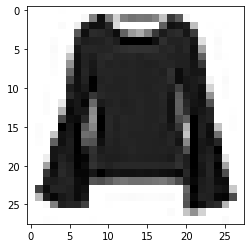

LABEL: 6
Smaller prediction: 4
Larger prediction: 6


In [59]:
#ADD YOUR CODE
predictions_mlp_large = best_mlp_large.predict(X_test)
predictions_mlp = mlp.predict(X_test)

index = None
for i in range(len(y_test)):
    if predictions_mlp[i] != y_test[i] and predictions_mlp_large[i] == y_test[i]:
        index = i
        break
        
if index is not None:
    plot_input(X_test, y_test, index)


print("Smaller prediction:",predictions_mlp[index])
print("Larger prediction:",predictions_mlp_large[index])

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


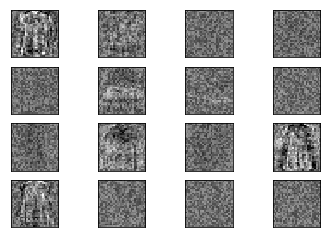

Weights with 10000 data points:


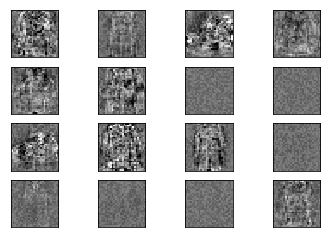

In [60]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

**ANSWER:**  In some weights, shapes of clothing can be glimpsed, while in other weights, a high amount of noise prevails which makes it difficult to recognize any image. Weights computed on a set of 10,000 data points have increased sharpness, indicating that the neural network is learning the patterns more effectively.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET.]**

**ANSWER**
I have applied the SVM method with the RBF kernel. To adjust the functionality of the algorithm I had the parameters "C" to control the tolerance of the differences of the margins and gamma

In [61]:
# ADD YOUR CODE
from sklearn.svm import SVC

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

mlp_chosen = SVC(kernel='rbf', C=10, gamma=0.01, random_state=ID).fit(X_train, y_train)

training_error_other = 1. - mlp_chosen.score(X_train, y_train) #ADD YOUR CODE
test_error_other = 1. - mlp_chosen.score(X_test, y_test) #ADD YOUR CODE


print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.002000
Best test error (other model): 0.204050


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

**ANSWER:**

The SVM algorithm fits very well into the data set, however, its execution during the training phase was particularly slow. Therefore, I've decided that I prefer using a NN.

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [62]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [63]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 12
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [64]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID).fit(X_train, y_train) #COMPLETE
# ADD CODE

## Comparison of clusters with true labels

## TO DO 13
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

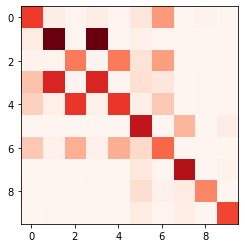

[[109.   8.   2.   8.   2.  15.  61.   0.   3.   0.]
 [ 10. 174.   1. 174.   1.   5.   1.   0.   0.   0.]
 [  3.   1.  78.   1.  78.  18.  59.   0.   0.   0.]
 [ 39. 122.   2. 122.   2.  21.  13.   0.   1.   0.]
 [ 30.   6. 112.   6. 112.   7.  36.   0.   1.   0.]
 [  0.   0.   0.   0.   0. 136.   0.  46.   0.   8.]
 [ 36.   4.  50.   4.  50.  25.  88.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  13.   0. 144.   0.   3.]
 [  2.   1.   0.   1.   0.  22.   4.   9.  72.   0.]
 [  0.   1.   0.   1.   0.   9.   1.   7.   0. 104.]]


In [65]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
#ADD CODE
from sklearn.metrics import confusion_matrix

cont_matrix = confusion_matrix(y_train, kmeans.predict(X_train))

cont_matrix_1=np.zeros([10,10])

for index in range(10):
    con=cont_matrix[:,index]
    cont_matrix_1[:,index]=cont_matrix[:,np.argmax(cont_matrix[index,:])]
    
plt.imshow(cont_matrix_1/cont_matrix.max(), cmap="Reds")
plt.show()
print(cont_matrix_1)

## TO DO 14
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

**ANSWER:** Main diagonal analysis shows that the Kmeans algorithm is somehow able to match the data to the actual labels.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 15
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [66]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

list_of_silhouttes = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=ID).fit(X_train, y_train) #ADD CODE
    silhouttescore = metrics.silhouette_score(X_train, kmeans.predict(X_train)) #COMPLETE
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.18888497278093228
Silhoutte coefficient for number of clusters=3: 0.17432311807808804
Silhoutte coefficient for number of clusters=4: 0.17280080346624818
Silhoutte coefficient for number of clusters=5: 0.16083984671745616
Silhoutte coefficient for number of clusters=6: 0.15290269041643778
Silhoutte coefficient for number of clusters=7: 0.16225387424141308
Silhoutte coefficient for number of clusters=8: 0.16675549553360416
Silhoutte coefficient for number of clusters=9: 0.16153271939356675
Silhoutte coefficient for number of clusters=10: 0.14721058565318754
Silhoutte coefficient for number of clusters=11: 0.14194584846273223
Silhoutte coefficient for number of clusters=12: 0.13745598591964267
Silhoutte coefficient for number of clusters=13: 0.13248040563089752
Silhoutte coefficient for number of clusters=14: 0.13394281978128567
Silhoutte coefficient for number of clusters=15: 0.13346976802328195


Let us now plot how the silhouette coefficients change with respect to k.

Text(0.5, 1.0, 'Silhouette score per number of clusters')

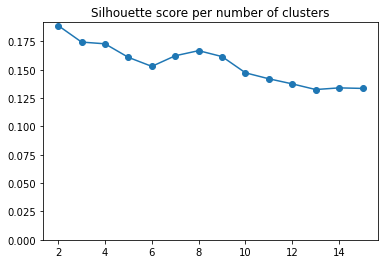

In [67]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

## TO DO 16

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

**ANSWER:** Based on the silhouette score, I selected the maximum value, i.e. k=2. However, bearing in mind that the dataset has 10 classes, this may be because the Kmeans algorithm focuses on splitting the data into two main categories (SHOES and CLOTHING) instead of distinguishing sub-categories.